In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Importando o dataset e conferindo sua estrutura
df = pd.read_csv("../dataset/Dataset.csv")
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [3]:
# Há 9551 entradas no dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [4]:
# Investigação preliminar dos dados
# Restaurantes são avaliados de 0 a 5 (0 sendo ausencia de review, 5 sendo excelente), a média de nota é 2,66
# Alguns restaurantes não tem nenhuma avaliação, outros tem quase 11 mil delas
# Alguns restaurantes não tem um valor médio para dois, talvez por erro de inserção ou ofertas promossionais
# Há casos outliers no outro extremo também, alguns estabelecimentos chegam a custar até 800 mil para duas pessoas, talvez estabelecimentos de luxo ou erro de inserção
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [5]:
# Limpeza de dados, buscando e eliminando duplicatas, dados invalidos, lidando com valores NaN, etc
df.duplicated().sum()

np.int64(0)

In [6]:
df.isna().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [7]:
# Agrupando restaurantes por cidade para calcular custo médio por localidade
df.groupby("City")["Average Cost for two"].mean().sort_values(ascending=False)

City
Jakarta           308437.500000
Tangerang         250000.000000
Bogor             160000.000000
Bandung           150000.000000
Pasay City          3333.333333
                      ...      
Lakeview              10.000000
Lakes Entrance         7.000000
Inverloch              7.000000
Dicky Beach            7.000000
Miller                 0.000000
Name: Average Cost for two, Length: 141, dtype: float64

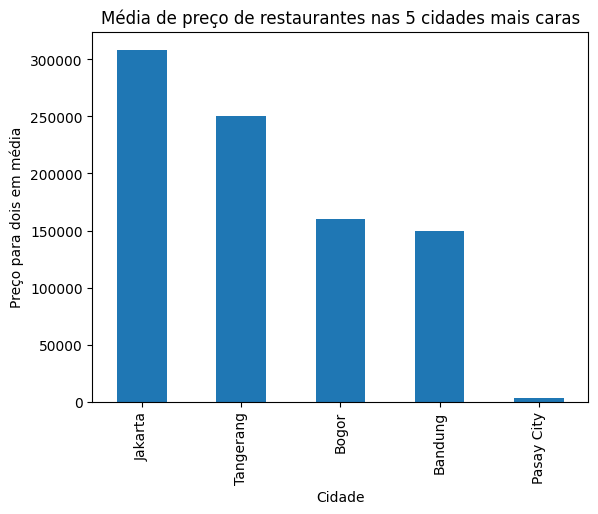

In [8]:
# Grafico das 5 cidades mais caras em média
df.groupby("City")["Average Cost for two"].mean().sort_values(ascending=False).head().plot(kind="bar")
plt.title("Média de preço de restaurantes nas 5 cidades mais caras")
plt.xlabel("Cidade")
plt.ylabel("Preço para dois em média")
plt.show()

In [9]:
# Quantos votos para cada tipo de culinaria
df.groupby("Cuisines")["Votes"].sum().sort_values(ascending=False)

Cuisines
North Indian, Mughlai            53747
North Indian                     46241
North Indian, Chinese            42012
Cafe                             30657
Chinese                          21925
                                 ...  
Chinese, Fast Food, Pizza            0
South Indian, Chinese, Mithai        0
South Indian, Pizza, Chinese         0
Cafe, North Eastern                  0
Afghani, North Indian                0
Name: Votes, Length: 1825, dtype: int64

In [10]:
# Analisando restaurantes que receberam avaliações para saber quanto os restaurantes não avaliados afetam o dataframe
data = df.groupby("Cuisines")["Votes"].sum().reset_index()
data[data["Votes"] != 0]

,Cuisines,Votes
0,Afghani,39
1,"Afghani, Mughlai, Chinese",2
3,"Afghani, North Indian, Pakistani, Arabian",3
4,African,373
5,"African, Portuguese",265
...,...,...
1820,"Western, Asian, Cafe",259
1821,"Western, Fusion, Fast Food",32
1822,World Cuisine,95
1823,"World Cuisine, Mexican, Italian",115


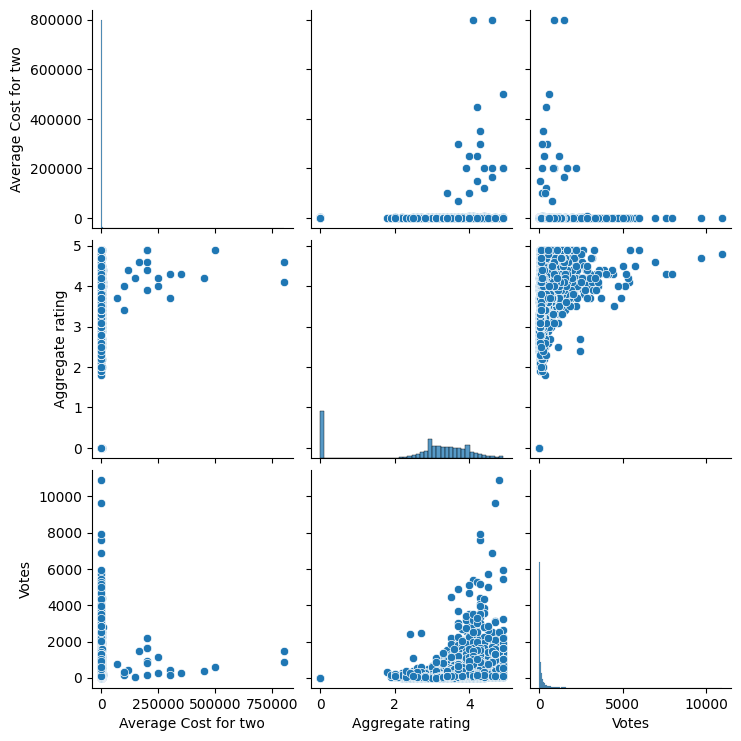

In [11]:
# Os restaurantes com maiores preços tem os melhores ratings
# Quanto mais caro, menos votos um restaurante recebe
sns.pairplot(df[["Average Cost for two", "Aggregate rating", "Votes"]])

In [12]:
# Fazendo comparações entre restaurantes com e sem delivery:
df_delivery = df[df['Has Online delivery'] == 'Yes']
df_no_delivery = df[df['Has Online delivery'] == 'No']

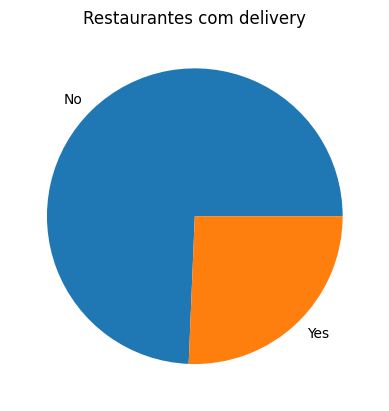

In [13]:
# Proporção de restaurantes com delivery vs sem delivery
df["Has Online delivery"].value_counts().plot(kind="pie")
plt.title("Restaurantes com delivery")
plt.ylabel("")
plt.show()

In [14]:
# Restaurantes com delivery tendem a ser mais bem avaliados
df.groupby('Has Online delivery')['Aggregate rating'].mean()

Has Online delivery
No     2.465296
Yes    3.248837
Name: Aggregate rating, dtype: float64

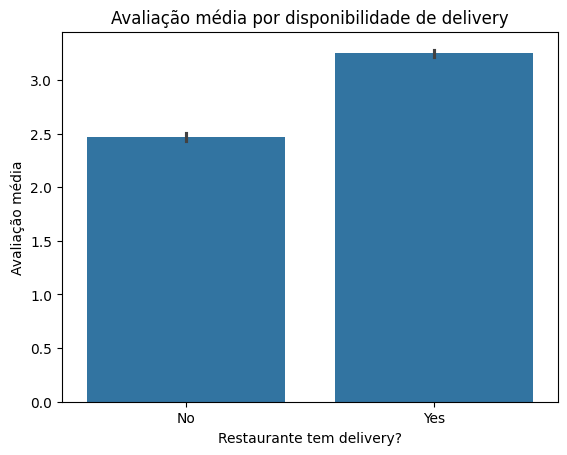

In [15]:
# Proporção de quanto o delivery afeta o rating de um restaurante
sns.barplot(
    data=df,
    x='Has Online delivery',
    y='Aggregate rating'
)
plt.title('Avaliação média por disponibilidade de delivery')
plt.xlabel("Restaurante tem delivery?")
plt.ylabel("Avaliação média")
plt.show()

In [16]:
# Restaurantes com delivery são mais baratos
df.groupby('Has Online delivery')['Average Cost for two'].mean()

Has Online delivery
No     1378.919296
Yes     678.635251
Name: Average Cost for two, dtype: float64

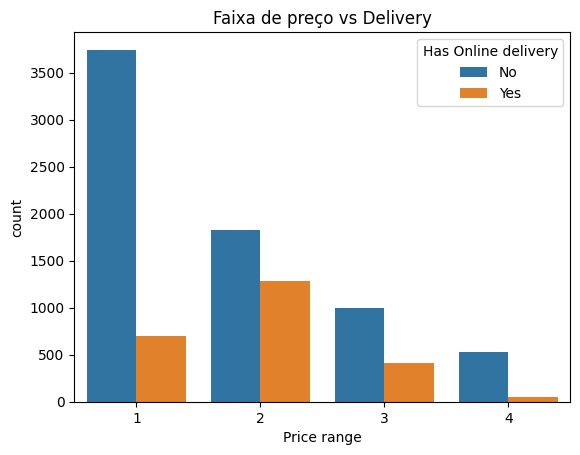

In [17]:
# Faixa de preço em restaurantes com vs sem delivery
sns.countplot(
    data=df,
    x='Price range',
    hue='Has Online delivery'
)
plt.title('Faixa de preço vs Delivery')
plt.show()


In [18]:
# Limpando o dataframe de todos os dados sem votos
# Sobraram 7403 entradas
df = df[df["Rating text"] != "Not rated"]
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 7403 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         7403 non-null   int64  
 1   Restaurant Name       7403 non-null   object 
 2   Country Code          7403 non-null   int64  
 3   City                  7403 non-null   object 
 4   Address               7403 non-null   object 
 5   Locality              7403 non-null   object 
 6   Locality Verbose      7403 non-null   object 
 7   Longitude             7403 non-null   float64
 8   Latitude              7403 non-null   float64
 9   Cuisines              7394 non-null   object 
 10  Average Cost for two  7403 non-null   int64  
 11  Currency              7403 non-null   object 
 12  Has Table booking     7403 non-null   object 
 13  Has Online delivery   7403 non-null   object 
 14  Is delivering now     7403 non-null   object 
 15  Switch to order menu  7403

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,7.403000e+03,7403.000000,7403.000000,7403.000000,7403.000000,7403.000000,7403.000000,7403.000000
mean,7.158676e+06,23.268675,63.462859,26.182970,1448.415102,1.970147,3.440024,202.185060
std,8.444634e+06,63.426253,44.696549,11.267380,18303.524265,0.930611,0.552195,479.195199
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,1.800000,4.000000
25%,1.534450e+04,1.000000,77.082416,28.475505,300.000000,1.000000,3.000000,19.000000
50%,3.120540e+05,1.000000,77.191784,28.570000,500.000000,2.000000,3.400000,60.000000
75%,1.821955e+07,1.000000,77.272293,28.645259,800.000000,3.000000,3.800000,181.000000
max,1.849606e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


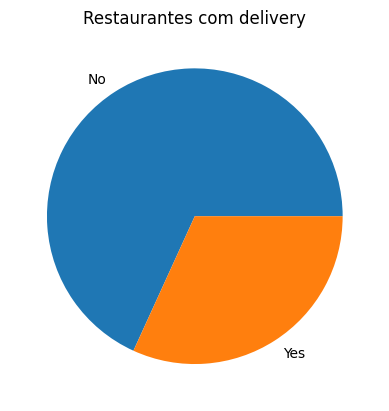

In [ ]:
# É notavel que restaurantes sem delivery tem mais chances de não receber nenhuma review dos clientes
df["Has Online delivery"].value_counts().plot(kind="pie")
plt.title("Restaurantes com delivery")
plt.ylabel("")
plt.show()

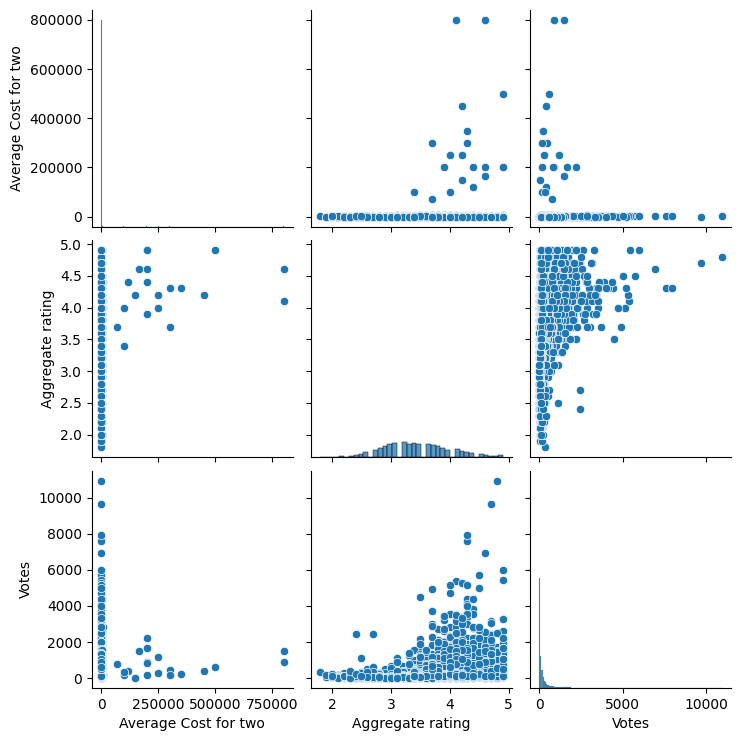

In [20]:
# O cenário agora que o dataframe foi limpo
sns.pairplot(df[["Average Cost for two", "Aggregate rating", "Votes"]])

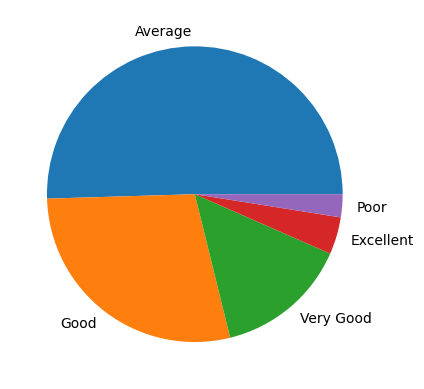

In [21]:
# Analisando como os restaurantes tendem a ser avaliados
df["Rating text"].value_counts().plot(kind="pie")
plt.ylabel("")
plt.show()

In [22]:
# A partir de agora, será feita feature engineering
# Escolhendo os dados que serão utilizados no estudo, aqueles com maiores chances de afetar a avaliação final de um restaurante
X = df[["Average Cost for two", "Has Table booking", "Has Online delivery", "Price range"]]

# Abaixo de 2.5 = Poor
# Entre 2.5 e 3.5 = Average
# Entre 3.5 e 4 = Good
# Entre 4 e 4.5 = Very Good
# Entre 4.5 e 5 = Excelent
y = df[["Aggregate rating"]]

In [23]:
X.head()

,Average Cost for two,Has Table booking,Has Online delivery,Price range
0,1100,Yes,No,3
1,1200,Yes,No,3
2,4000,Yes,No,4
3,1500,No,No,4
4,1500,Yes,No,4


In [24]:
# Transformando todos os dados em valores numéricos
from sklearn import preprocessing
labelencoder = preprocessing.LabelEncoder()

In [25]:
X["Has Table booking"] = labelencoder.fit_transform(X["Has Table booking"])
X["Has Online delivery"] = labelencoder.fit_transform(X["Has Online delivery"])

In [26]:
# 0 = Não, 1 = Sim
X.head()

,Average Cost for two,Has Table booking,Has Online delivery,Price range
0,1100,1,0,3
1,1200,1,0,3
2,4000,1,0,4
3,1500,0,0,4
4,1500,1,0,4


In [27]:
# Scaling é feito pra manter os dados em ranges comparaveis
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [28]:
X = scaler.fit_transform(X)

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
# 20% dos dados serão usados pra teste, 80% serão usados para o treinamento do modelo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [31]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

In [32]:
def modelresults(predictions):
    print("A média de erros absolutas do modelo é {}".format(mean_absolute_error(y_test, predictions)))
    print("A raiz dos erros quadráticos médios do modelo é {}".format(np.sqrt(mean_squared_error(y_test, predictions))))

In [33]:
# Realizando o treinamento do modelo ultilizando Regressão Linear
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [34]:
lr.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [35]:
predictionsfromlr = lr.predict(X_test)

In [36]:
modelresults(predictionsfromlr)

A média de erros absolutas do modelo é 0.39702744560742453
A raiz dos erros quadráticos médios do modelo é 0.5013097439676664


In [37]:
# Testando o resultado de Suport Vector Machines (SVM) para ver como ele se compara com Regressão Linear
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

In [38]:
# Testando diversos parametros para encontrar o ideal para o problema
svrmodel = SVR()
param_gridsvr = {"C": [0.1, 0.5], "kernel": ["linear", "poly"], "degree": [2]}

In [39]:
gridsvr = GridSearchCV(svrmodel, param_gridsvr)
gridsvr.fit(X_train, y_train)

,estimator,SVR()
,param_grid,"{'C': [0.1, 0.5], 'degree': [2], 'kernel': ['linear', 'poly']}"
,scoring,None
,n_jobs,None
,refit,True
,cv,None
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,kernel,'linear'


In [42]:
predsgridsvr = gridsvr.predict(X_test)
modelresults(predsgridsvr)

A média de erros absolutas do modelo é 0.393182251569007
A raiz dos erros quadráticos médios do modelo é 0.5033719609231875


In [43]:
# Agora os resultados dos dois algoritmos anteriores são comparados com Arvores de Decisão
# Como nos testes anteriores, testamos uma grade de diversos parametros para encontrar os ideias para este algoritimo aplicado a este problema
from sklearn.tree import DecisionTreeRegressor

param_grid = {
    "max_depth" : [10, 30],
    "min_samples_leaf" : [1, 2],
    "min_samples_split": [2, 5]
}

treemodel = DecisionTreeRegressor()

grid_tree = GridSearchCV(estimator = treemodel, param_grid = param_grid)

In [44]:
grid_tree.fit(X_train, y_train)

,estimator,DecisionTreeRegressor()
,param_grid,"{'max_depth': [10, 30], 'min_samples_leaf': [1, 2], 'min_samples_split': [2, 5]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,None
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'squared_error'


In [ ]:
# Arvores de decisão apresentam a menor taxa de erro até agora
treepredictions = grid_tree.predict(X_test)
modelresults(treepredictions)

A média de erros absolutas do modelo é 0.3646865371874093
A raiz dos erros quadráticos médios do modelo é 0.4657519377975458


In [46]:
# Fazendo o mesmo com Random Forest
from sklearn.ensemble import RandomForestRegressor

param_gridrfr = {
    "max_depth" : [5, 15],
    "n_estimators" : [2, 5, 10],
}

rfrmodel = RandomForestRegressor()

gridrfr = GridSearchCV(rfrmodel, param_gridrfr)

In [47]:
gridrfr.fit(X_train, y_train)

,estimator,RandomForestRegressor()
,param_grid,"{'max_depth': [5, 15], 'n_estimators': [2, 5, ...]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,None
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,10


In [ ]:
# Ligeiramente melhor que Arvores de Decisão
randomforestspredictions = gridrfr.predict(X_test)
modelresults(randomforestspredictions)

A média de erros absolutas do modelo é 0.3614437485804306
A raiz dos erros quadráticos médios do modelo é 0.46241023031250855


In [53]:
# Testando KNN da mesma forma
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
knn_param_grid = {"n_neighbors": [14, 15, 16]}
knn_grid_search = GridSearchCV(knn, knn_param_grid)

In [54]:
knn_grid_search.fit(X_train, y_train)

,estimator,KNeighborsRegressor()
,param_grid,"{'n_neighbors': [14, 15, ...]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,None
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_neighbors,15


In [55]:
# O melhor algoritimo para o problema até agora segue sendo Random Forest
knn_predictions = knn_grid_search.predict(X_test)
modelresults(knn_predictions)

A média de erros absolutas do modelo é 0.37092955210443396
A raiz dos erros quadráticos médios do modelo é 0.4756801638453507


In [57]:
# Por ter a menor taxa de erro, o modelo com Random Forest será utilizado no sistema
import joblib 
joblib.dump(gridrfr, "mlmodel.pkl")
joblib.dump(scaler, "Scaler.pkl")

['Scaler.pkl']